In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
titanic1=pd.read_csv(r'C:\Users\LENOVO THINKPAD YOGA\Documents\files\SaleWebDesign.com-Python-Data-Science\SaleWebDesign.com-Python-Data-Science\17. Logistic Regression\titanic_train.csv')

In [89]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
titanic1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

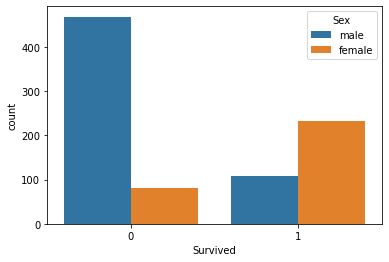

In [93]:
sns.countplot(x=titanic1['Survived'], hue = titanic1['Sex'], data= titanic1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

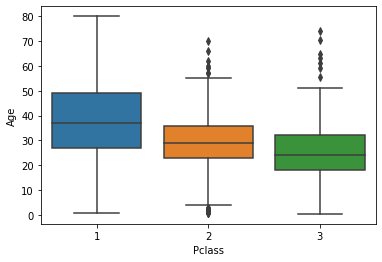

In [94]:
sns.boxplot(x=titanic1['Pclass'], y=titanic1['Age'], data = titanic1)

<AxesSubplot:>

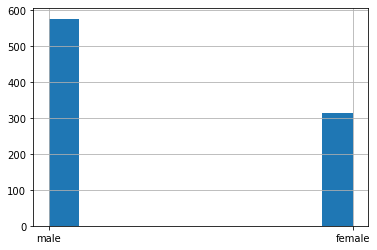

In [95]:
titanic1['Sex'].hist()

In [96]:
titanic1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

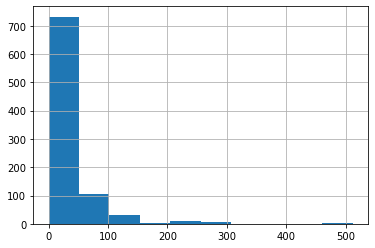

In [97]:
titanic1['Fare'].hist()

In [99]:
titanic1['Fare1'] = titanic1['Fare']/titanic1['Fare'].max()

<AxesSubplot:>

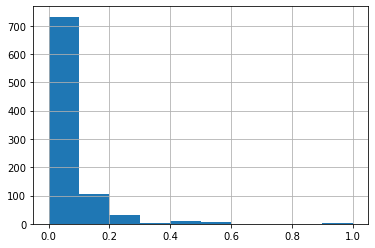

In [100]:
titanic1['Fare1'].hist()

In [101]:
titanic1.drop(columns= 'Fare', axis=1, inplace= True)

In [102]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,0.015713


<AxesSubplot:>

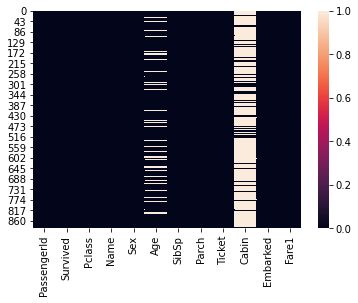

In [103]:
sns.heatmap(titanic1.isnull())

In [104]:
titanic1.drop(columns='Cabin', axis = 1, inplace = True)

In [105]:
titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Embarked         2
Fare1            0
dtype: int64

In [106]:
def average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [107]:
titanic1['Age']= titanic1[['Age', 'Pclass']].apply(average_age, axis=1)

In [108]:
titanic1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
titanic1['Embarked'].replace(np.nan, 'S', inplace=True)

In [110]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Fare1          0
dtype: int64

In [111]:
    Sex = pd.get_dummies(titanic1['Sex'], drop_first=True)

In [112]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [113]:
titanic1 = pd.concat([titanic1,Sex], axis = 1)

In [114]:
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare1,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0.014151,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,0.139136,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,0.015469,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,0.103644,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0.015713,1


In [115]:
Embark = pd.get_dummies(titanic1['Embarked'], drop_first=True)

In [116]:
Embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [117]:
titanic1= pd.concat([titanic1,Embark], axis= 1)

In [118]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Fare1          0
male           0
Q              0
S              0
dtype: int64

In [119]:
titanic1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked', 'Fare1', 'male', 'Q', 'S'],
      dtype='object')

In [126]:
titanic1.to_csv(r'C:\Users\LENOVO THINKPAD YOGA\Desktop\Project folder\titanic.csv')

In [132]:
titanic=titanic1.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [133]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare1,male,Q,S
0,0,3,22.0,1,0,0.014151,1,0,1
1,1,1,38.0,1,0,0.139136,0,0,0
2,1,3,26.0,0,0,0.015469,0,0,1
3,1,1,35.0,1,0,0.103644,0,0,1
4,0,3,35.0,0,0,0.015713,1,0,1


In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lm=LogisticRegression()

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X = titanic.drop(['Survived'], axis =1)
y=titanic['Survived']

In [190]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
lm.fit(X_train,y_train)

C:\Users\LENOVO THINKPAD YOGA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
Prediction = lm.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
print(confusion_matrix(y_test,Prediction))

[[91 14]
 [19 55]]


In [195]:
from sklearn.metrics import classification_report

In [196]:
print(classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
#using elbow method to generate the n_neighbors value to use

In [200]:
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    error = np.mean(prediction != y_test)
    error_rate.append(error)

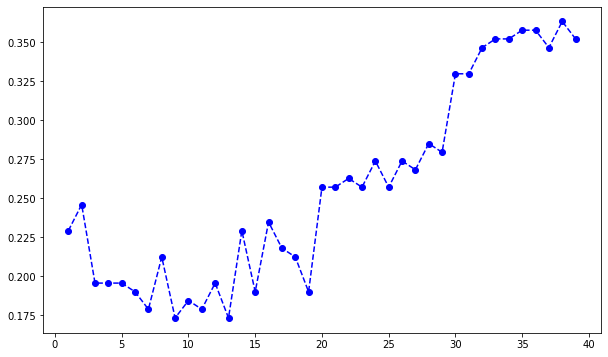

In [201]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [202]:
knn = KNeighborsClassifier(n_neighbors=9)

In [203]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [204]:
prediction = knn.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix

In [206]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       105
           1       0.89      0.66      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.82       179

[[99  6]
 [25 49]]


  KNeighbour model is a better approach for our model with accuracy of 0.83 compared to LinearRegression with accuracy of 0.82
 